###### Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
* Draw the inferences from the clusters obtained.

* Data Description:
 
* The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

* ID --Unique ID

* Balance--Number of miles eligible for award travel

* Qual_mile--Number of miles counted as qualifying for Topflight status

* cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
* cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
* cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

* 1 = under 5,000
* 2 = 5,000 - 10,000
* 3 = 10,001 - 25,000
* 4 = 25,001 - 50,000
* 5 = over 50,000

* Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

* Bonus_trans--Number of non-flight bonus transactions in the past 12 months

* Flight_miles_12mo--Number of flight miles in the past 12 months

* Flight_trans_12--Number of flight transactions in the past 12 months

* Days_since_enrolled--Number of days since enrolled in flier program

* Award--whether that person had award flight (free flight) or not


In [63]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [34]:
#Data display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [35]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


# 2. Data Exploration
## Descriptive Statistics

In [36]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [37]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [38]:
 #different cc_miles have different max values.so, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print ('unique_cc2',data.cc2_miles.unique())
print('unique_cc3',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


### 2.1 Missing Values

In [39]:
data.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

### Duplicated Values
##### print the duplicated rows

In [40]:
data.duplicated().sum()

1

In [41]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [42]:
data.Balance.duplicated()

ID
1       False
2       False
3       False
4       False
5       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Name: Balance, Length: 3999, dtype: bool

### data.duplicated()

In [43]:
data.drop_duplicates()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [44]:
data.drop_duplicates(inplace=True)

In [45]:
data[data.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,


#### There are no missing / Null and Duplicated values either in columns or rows, so we can move on to the next step, which is Exploratory Data Analysis.

## 3. Exploratory Data Analysis


##### Lets analyze the features by creating histograms to understand the distribution

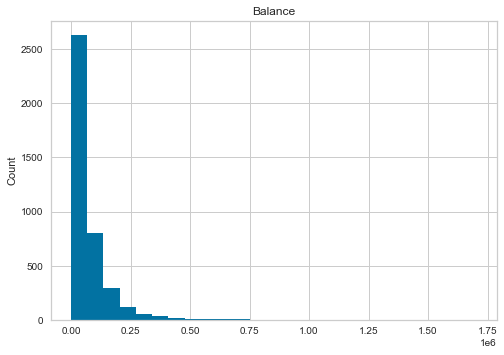

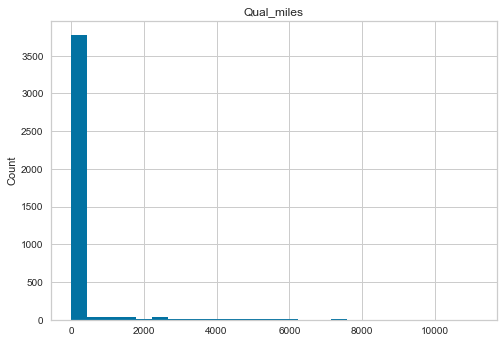

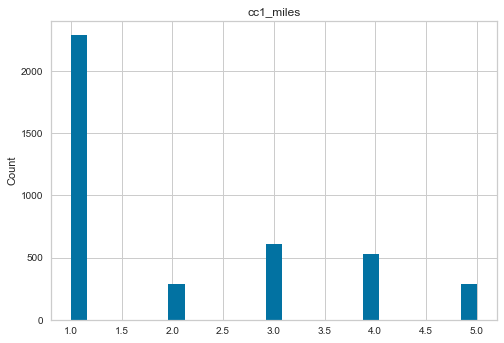

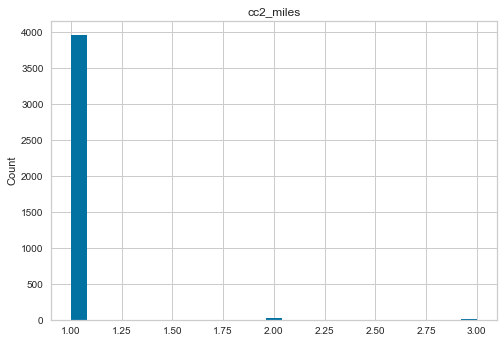

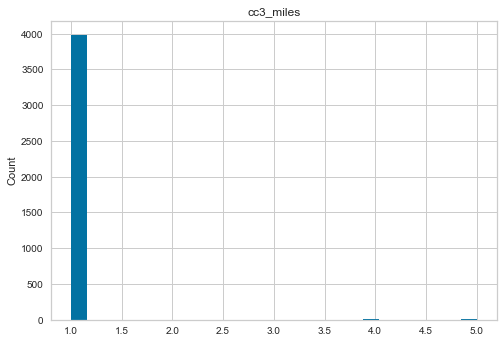

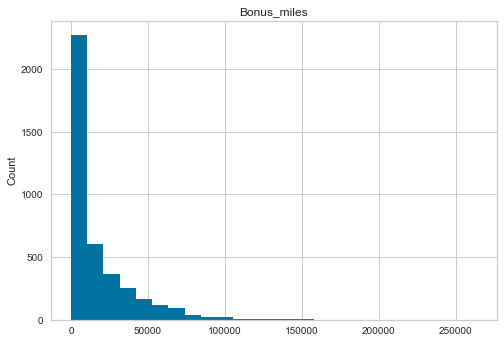

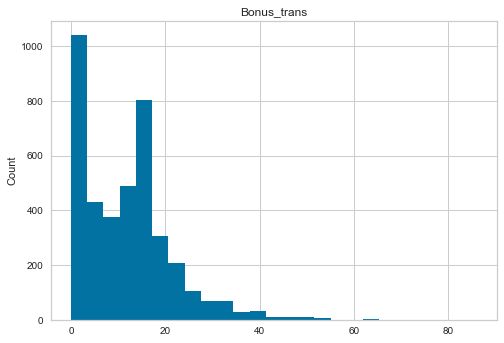

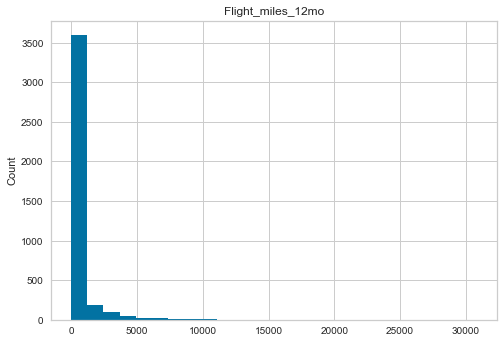

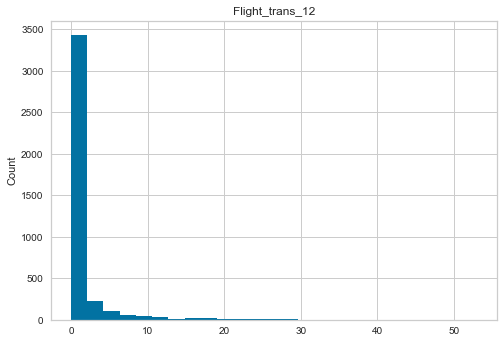

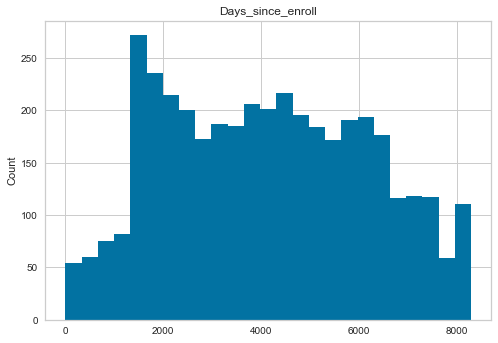

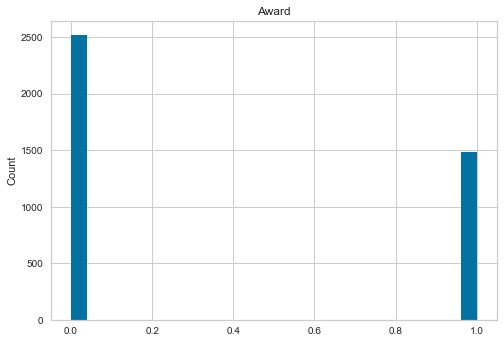

In [46]:
for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()


Balance


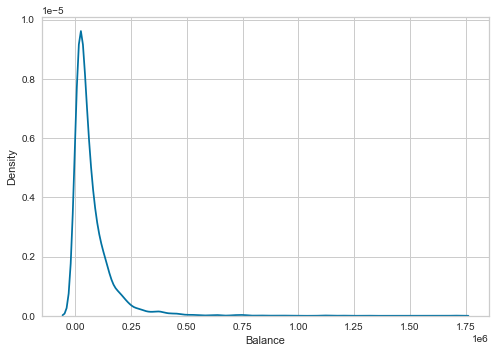

Qual_miles


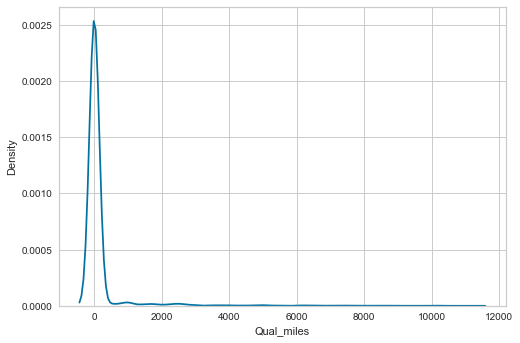

cc1_miles


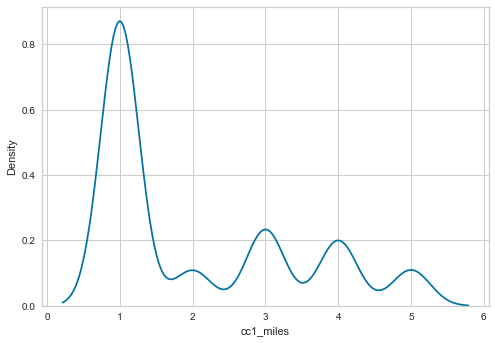

cc2_miles


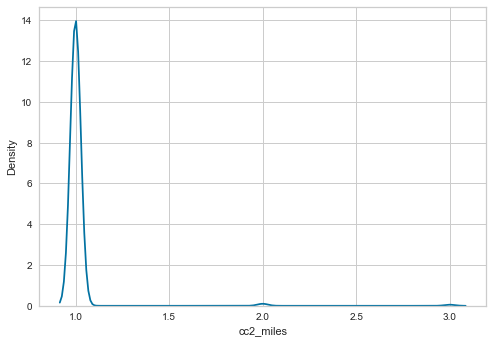

cc3_miles


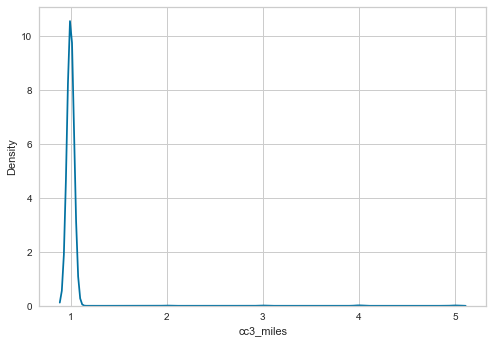

Bonus_miles


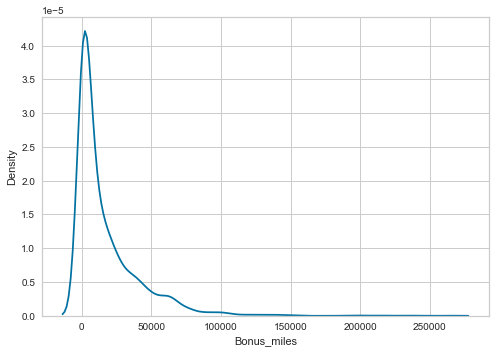

Bonus_trans


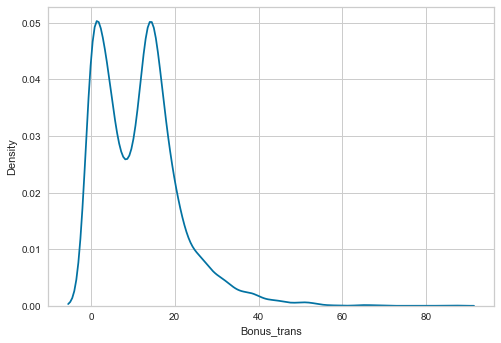

Flight_miles_12mo


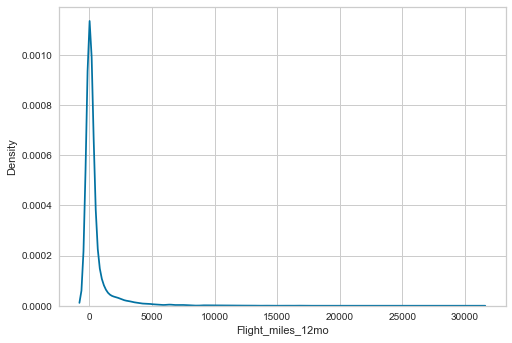

Flight_trans_12


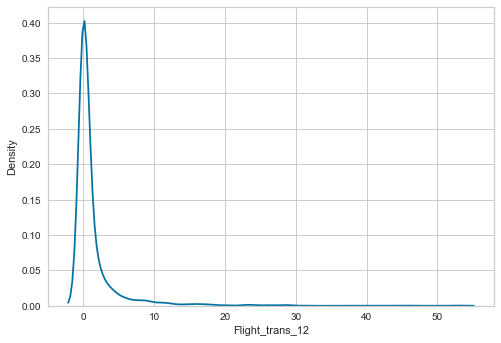

Days_since_enroll


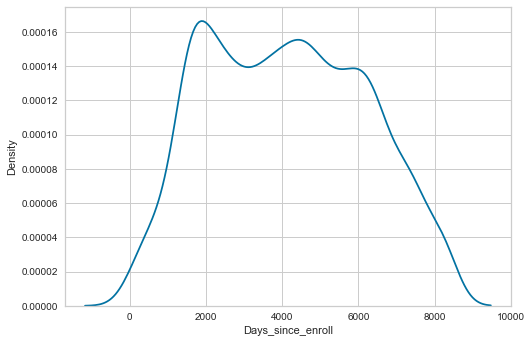

Award


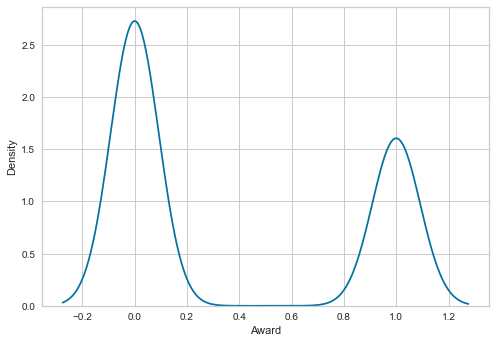

In [47]:
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

### 3.1 Outliers Detection

In [48]:
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

<AxesSubplot:>

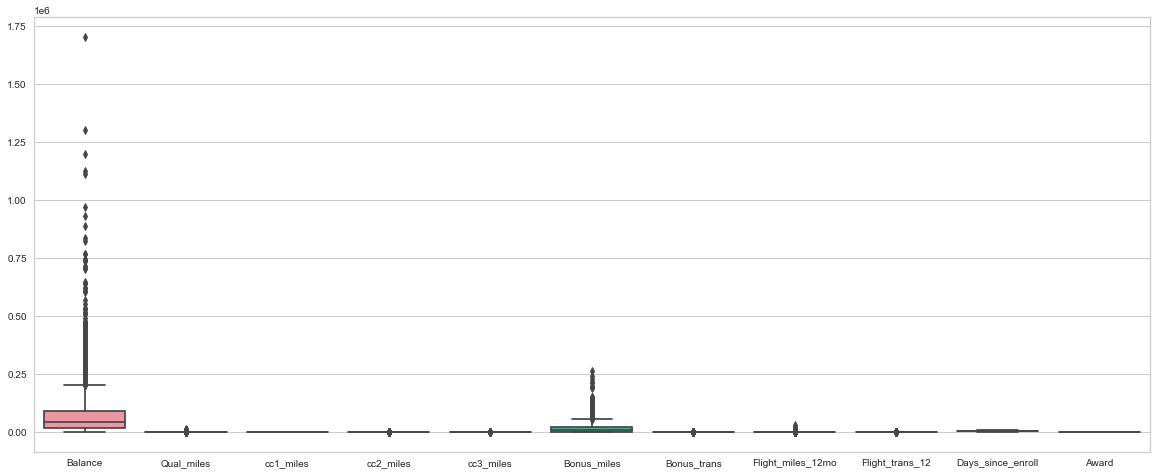

In [49]:
plt.figure(figsize=(20,8))
sns.boxplot(data=data)

## 4. Data Visualization

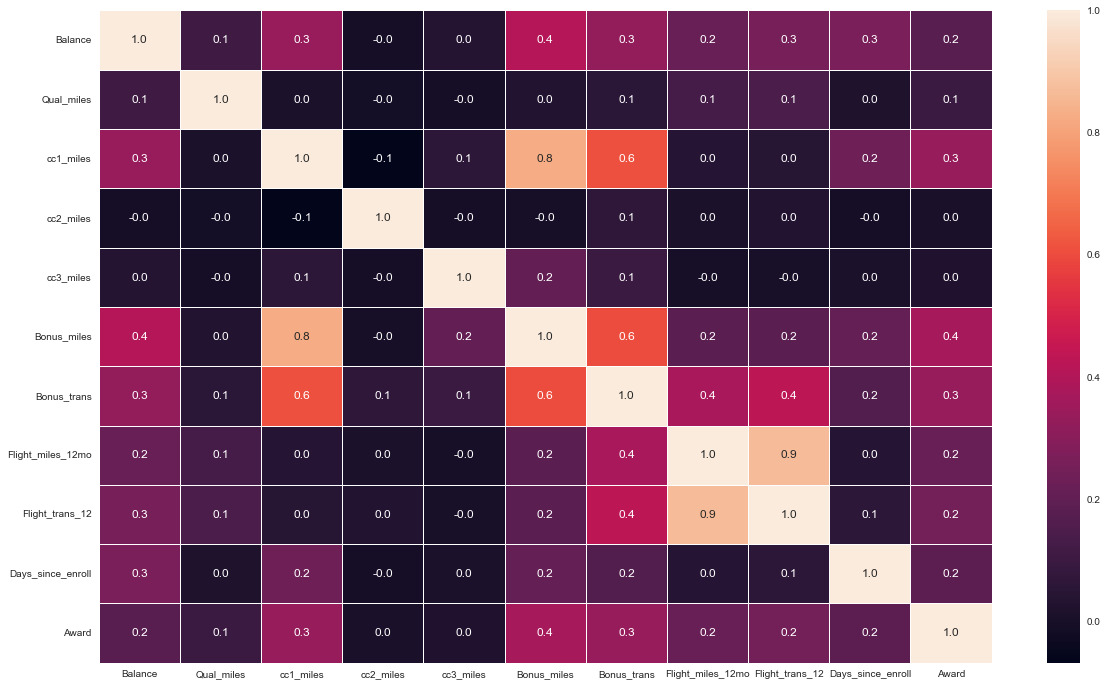

In [50]:
# correlation heatmap

f,ax = plt.subplots(figsize=(20,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

#### Unique points in this correlation matrix:

* flight_trans_12 is positively correlated with flight_miles_12mo
* bonus_trans is positively correlated with cc1_miles
* bonus_trans is positively correlated with bonus_miles
* bonus_miles is positively correlated with cc1_miles

###### In other words, the following are positively correlated

* Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
* Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
* Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
* Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

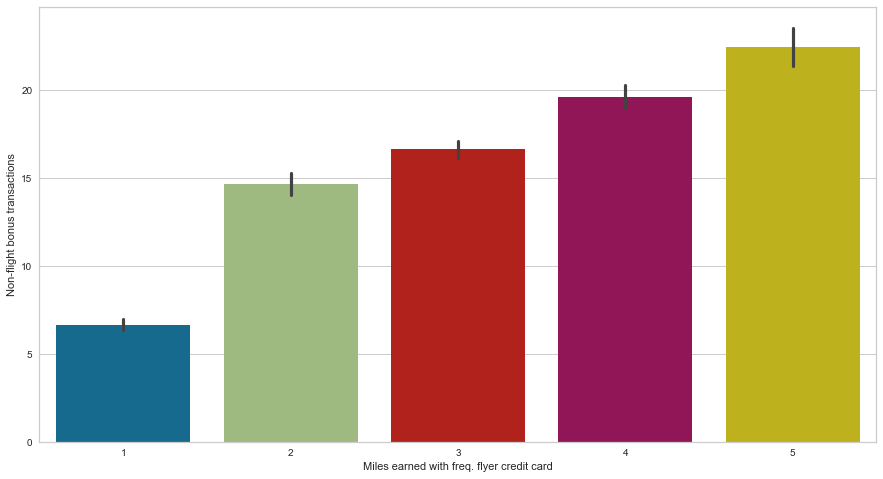

In [51]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (15,8))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.show()

### People who fly more frequently use bonus transactions more
# 5. Data Preprocessing
### 5.1) Standardizing the Data

In [52]:
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

### 5.2) Normalizing the data

In [53]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

## 6. KMeans Clustering

In [97]:
# Standardization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_df = scaler.fit_transform(data.iloc[:,1:])
print(data_df)

[[-0.18632279 -0.76973166 -0.09825429 ...  1.39523468 -0.76707163
  -0.69850177]
 [-0.18632279 -0.76973166 -0.09825429 ...  1.37973643 -0.76707163
  -0.69850177]
 [-0.18632279 -0.76973166 -0.09825429 ...  1.41170157 -0.76707163
  -0.69850177]
 ...
 [-0.18632279  0.68289387 -0.09825429 ... -1.31599028  1.30365921
  -0.69850177]
 [-0.18632279 -0.76973166 -0.09825429 ... -1.3164746  -0.76707163
  -0.69850177]
 [-0.18632279 -0.76973166 -0.09825429 ... -1.31792757 -0.76707163
  -0.69850177]]


In [104]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(data_df)
    wcss.append(kmeans.inertia_)

In [105]:
wcss

[43978.000000000015,
 31987.477878279904,
 27638.914688822013,
 23903.626601576652,
 20463.80384497563,
 17894.84777600426,
 16013.753962602876,
 14490.499756709398,
 13425.274431017731,
 12433.746497686523]

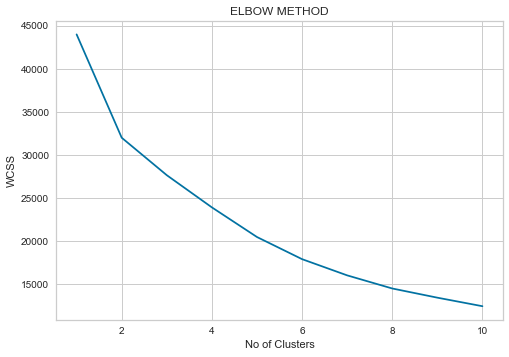

In [106]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [107]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(n_clusters=2, random_state=12)
clusters_new.fit(data_df)

KMeans(n_clusters=2, random_state=12)

In [108]:
clusters_new.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
#Assign clusters to the data set
data['clusterid_new'] = clusters_new.labels_

In [111]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clusterid_new
ID,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0


In [112]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.14560597,  1.13219947, -0.03109486,  0.12475446,  0.99978108,
         0.91736828,  0.34966809,  0.39651334,  0.35835851,  0.72713995,
         1.43163559],
       [-0.07104184, -0.55240547,  0.01517133, -0.06086829, -0.48779791,
        -0.44758832, -0.17060471, -0.19346073, -0.17484481, -0.35477502,
        -0.69850177]])

In [113]:
data.groupby('clusterid_new').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
clusterid_new,,,,,,,,,,,,
0,124044.084668,256.800153,3.618612,1.009916,1.036613,41293.292906,20.413425,949.772693,2.877956,4859.110603,0.721587,1.0
1,49017.087458,89.188314,1.299218,1.016747,1.000372,5369.085597,7.307034,221.291775,0.640119,3758.179382,0.199107,0.0


##### We can now clearly see the 2 number of clusters formed, which can be described as under
* Cluster1, Tier 1 = "1" = Defines the group of fliers that earn the most out of the card and are frequent fliers
* Cluster0, Tier 2 = "0" = Defines the group of fliers that earn the least and are the least frequent fliers

## 7 Hierarchical Clustering Algorithm

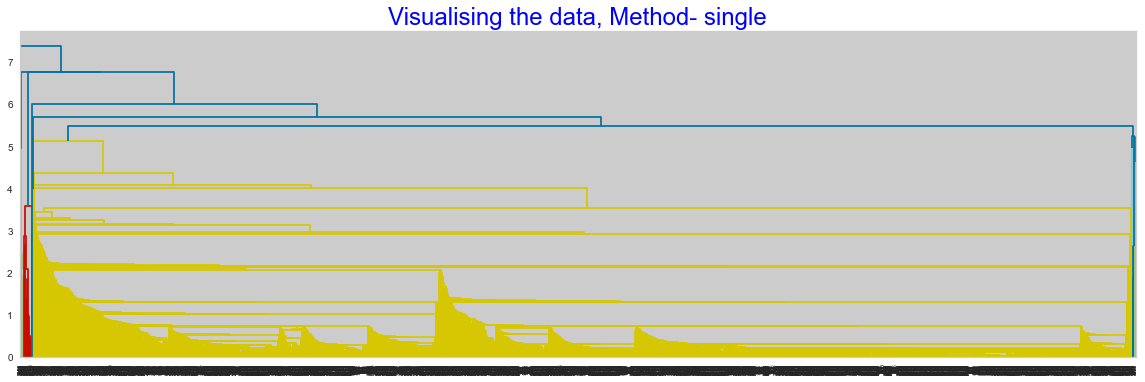

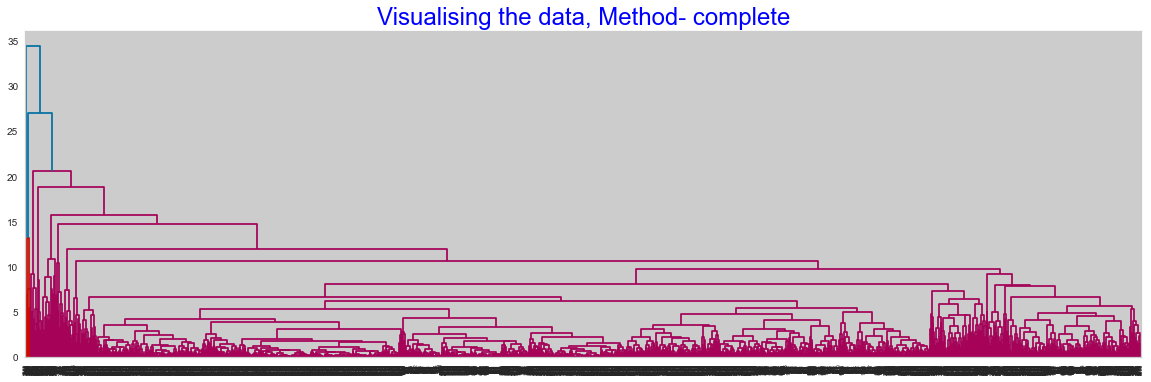

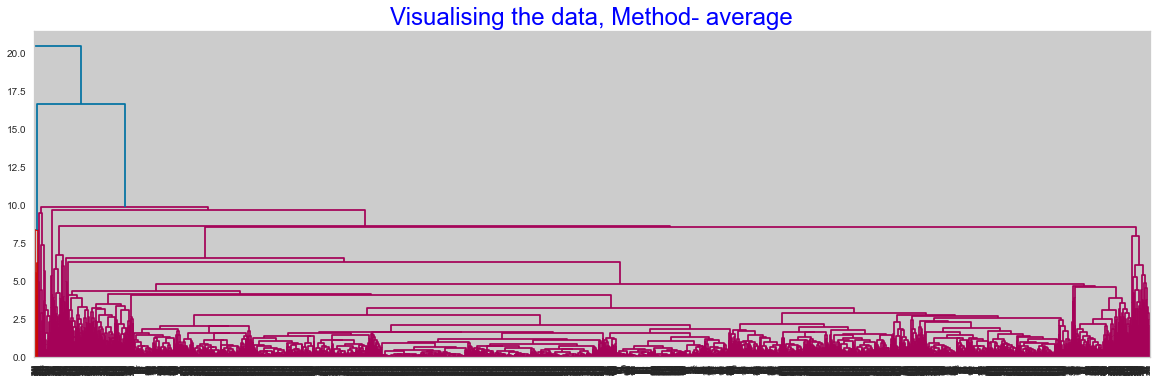

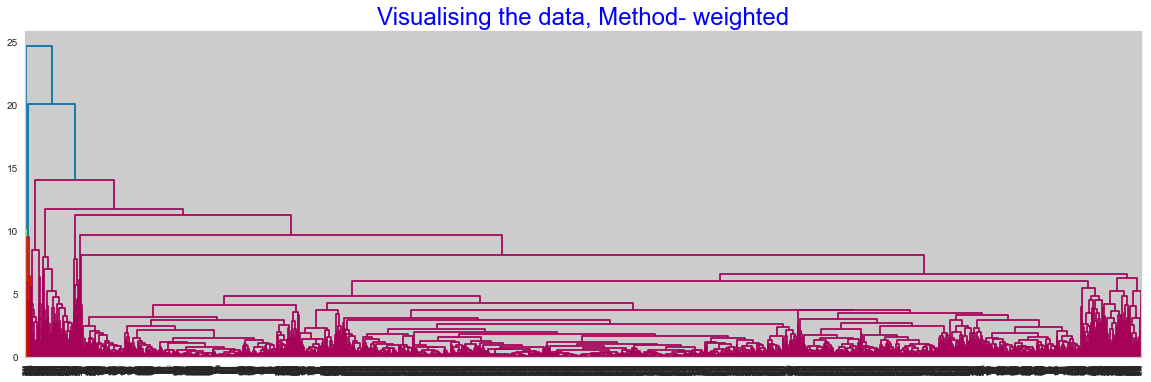

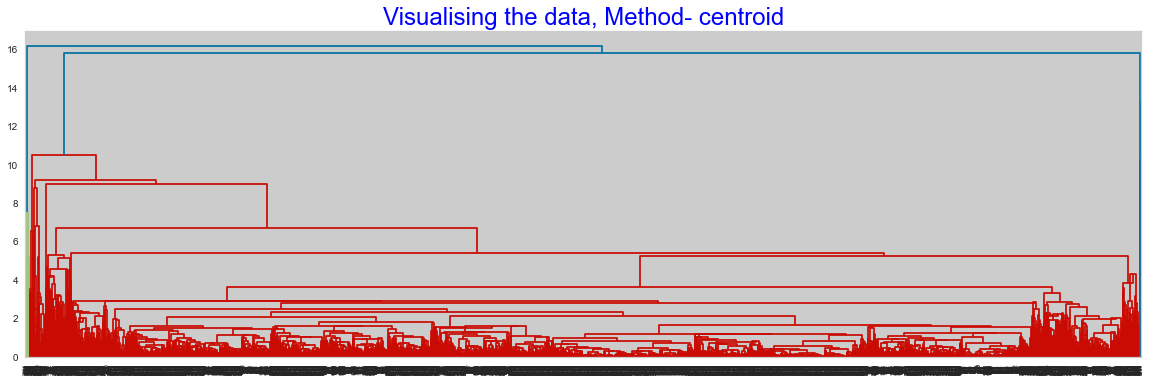

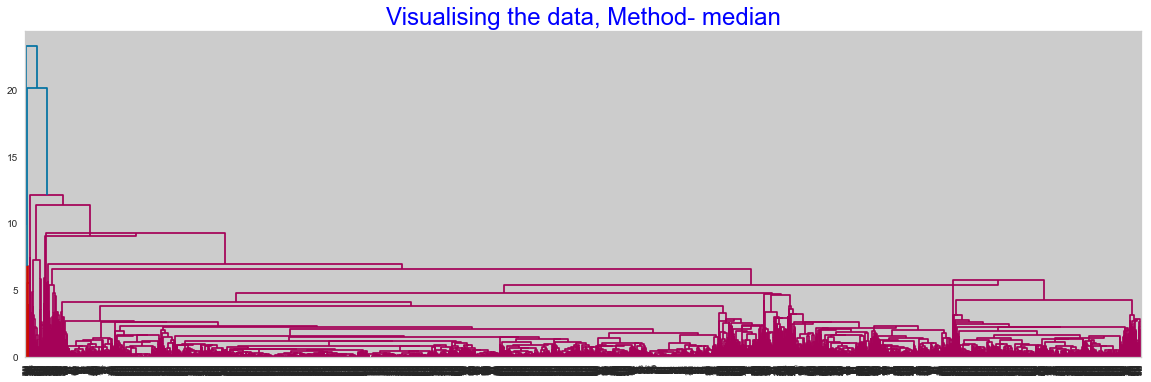

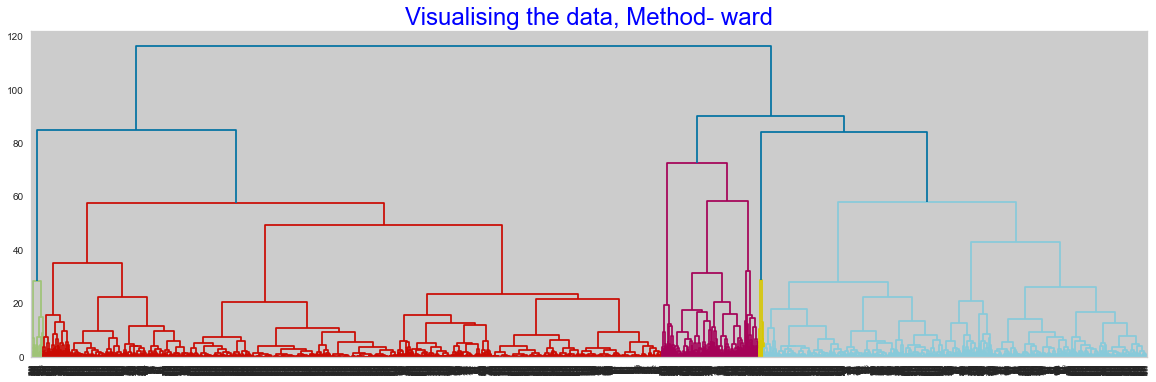

In [120]:

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [123]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.26218988124644166
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8202389034236341
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8202389034236341
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8635231915060849

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.27069580618649813
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7864058483738754
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7864058483738754
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7480456779564557

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2857770026648299
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6614647564003961
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7828467677732052
For

## 7.2 PCA

In [124]:

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

In [125]:

print(pca_std.singular_values_)

[114.59929366  83.12095737  64.93711956  63.52257567  61.95910679
  60.39325992  56.7960262   49.8137685   37.95289819]


In [126]:
# variance containing in each formed PCA

print(pca_std.explained_variance_ratio_*100)

[29.8626543  15.71034052  9.58849765  9.17530952  8.72920759  8.29356916
  7.33500521  5.64239286  3.27532512]


In [127]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of
#........variance will give much information..

cum_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cum_variance

array([29.8626543 , 45.57299482, 55.16149247, 64.33680198, 73.06600957,
       81.35957873, 88.69458394, 94.3369768 , 97.61230192])

# 8. DBSCAN - (Density Based Spatial Clustering of Applications with Noise)

In [128]:
from sklearn.cluster import DBSCAN 

In [132]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [133]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


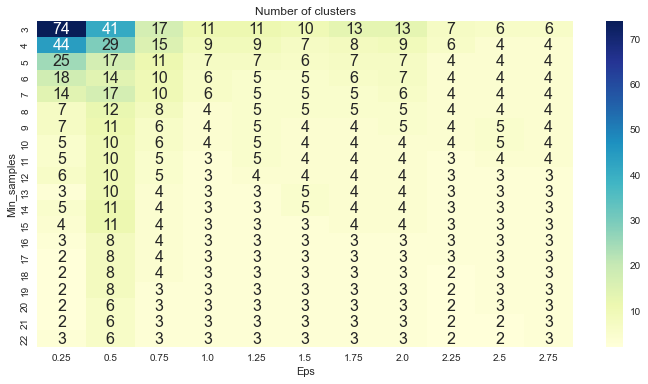

In [134]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

#### As the heatplot above shows, the number of clusters vary from 74 to 2.

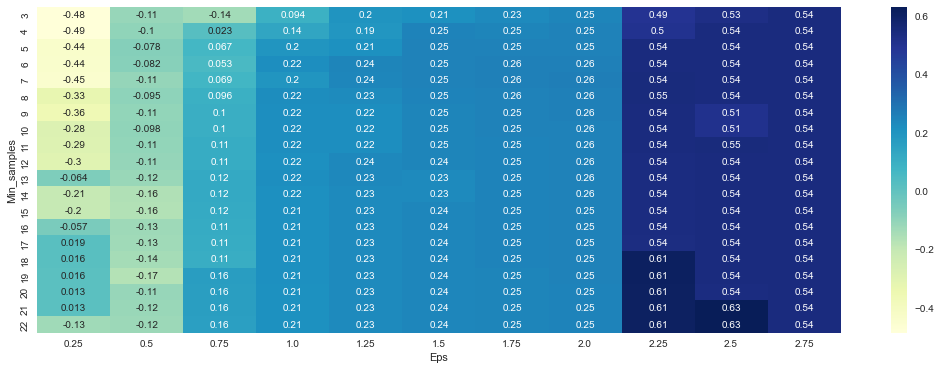

In [135]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

#### Global maximum is 0.63 for eps=2.5 and min_samples=21 and 22

In [136]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


#### Run DBSCAN on Standard Scaled data with optimal min_sample and epsilon values

In [137]:
dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [138]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
df['DBSCAN_labels'] = dbscan.labels_
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clusterid_new,DBSCAN_labels
ID,,,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,0,0


In [140]:
df.groupby('DBSCAN_labels').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Kmeans_label,clusterid_new
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_labels,,,,,,,,,,,,,
-1,211990.889423,1522.576923,2.509615,1.278846,1.235577,45335.081731,24.754808,3276.389423,9.548077,4768.596154,0.687500,0.764423,0.235577
0,66025.489182,68.500792,2.035092,1.000000,1.000000,15602.254090,10.883113,305.613193,0.925330,4083.549868,0.353034,0.303958,0.696042


# 9. Conclusion:
* I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
* Applied Standardazation & MinMaxScalar transformation on the data to use Principle componets analysis effectively.
* I have used & analyzed two clustering techniques here..i) KMeans, ii) Hierarchical Clusterig & iii) DBSCAN.
